# House Prices: Advanced Regression Techniques

# Importing Necessery Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [162]:
pd.pandas.set_option("display.max_columns",None)

In [234]:
# reading the dataset
df=pd.read_csv("housePrice_train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Data Cleaning and Exploratory Data Analysis

In [235]:
# shape of dataset
df.shape

(1460, 81)

In [236]:
# checking null values
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [237]:
# Missing Data 
missing_var = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
for i in missing_var:
    print(i,"-"*10,df[i].isna().sum(),"missing values","-"*10,round(df[i].isna().mean()*100,4),"% missing values")

LotFrontage ---------- 259 missing values ---------- 17.7397 % missing values
Alley ---------- 1369 missing values ---------- 93.7671 % missing values
MasVnrType ---------- 8 missing values ---------- 0.5479 % missing values
MasVnrArea ---------- 8 missing values ---------- 0.5479 % missing values
BsmtQual ---------- 37 missing values ---------- 2.5342 % missing values
BsmtCond ---------- 37 missing values ---------- 2.5342 % missing values
BsmtExposure ---------- 38 missing values ---------- 2.6027 % missing values
BsmtFinType1 ---------- 37 missing values ---------- 2.5342 % missing values
BsmtFinType2 ---------- 38 missing values ---------- 2.6027 % missing values
Electrical ---------- 1 missing values ---------- 0.0685 % missing values
FireplaceQu ---------- 690 missing values ---------- 47.2603 % missing values
GarageType ---------- 81 missing values ---------- 5.5479 % missing values
GarageYrBlt ---------- 81 missing values ---------- 5.5479 % missing values
GarageFinish --------

* Some features have more than 90% missing values, keeping them for analysis and treating them does not make sense, so its better to drop them.
* Some features like `BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2` represent same set of missing values representing same set of observations, so dropping them. Similarly goes with `Garage` type variables and `MasVnr` types.
* Keeping only `Electrical` variable for analysis. 

### Since they are many missing values, we need to find the relationship between missing values and Sales Price(target variable)
## Let's plot some diagram for this relationship

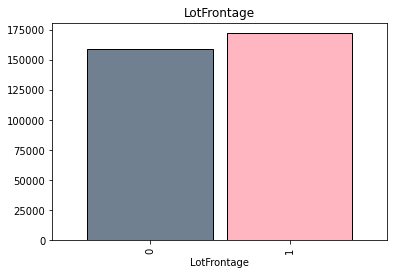

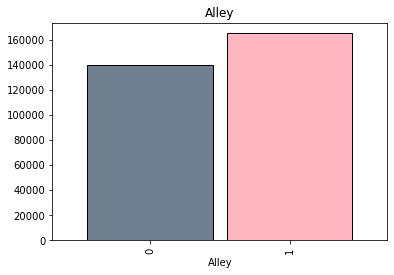

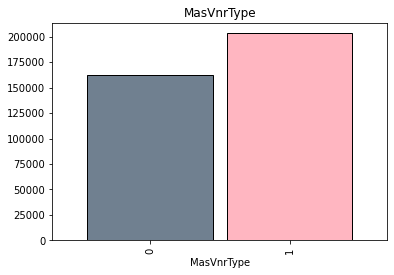

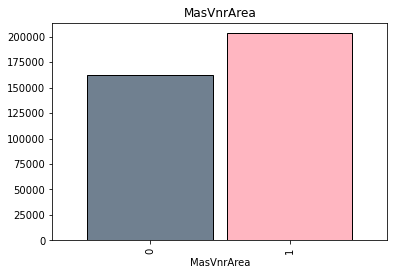

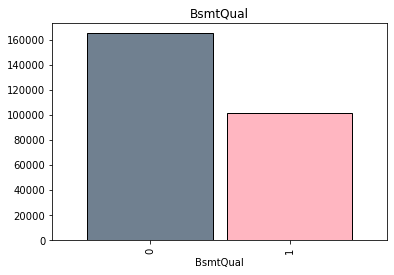

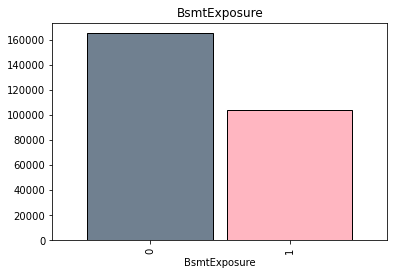

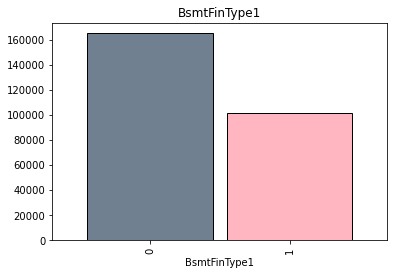

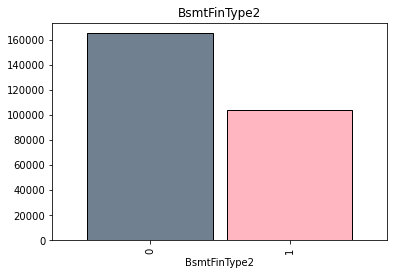

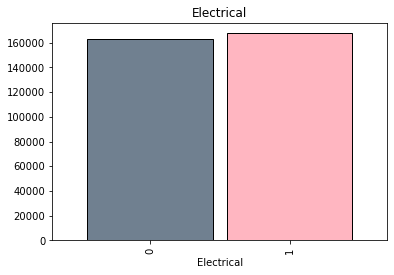

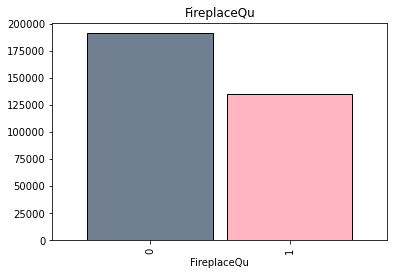

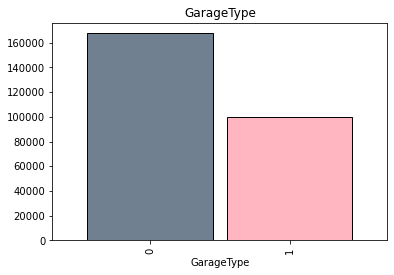

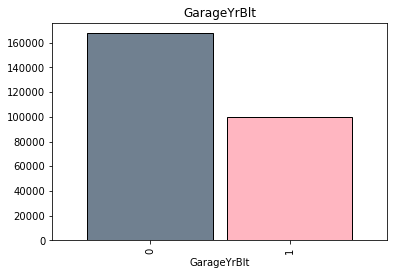

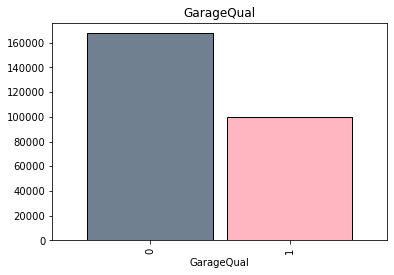

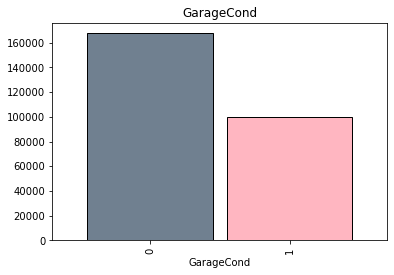

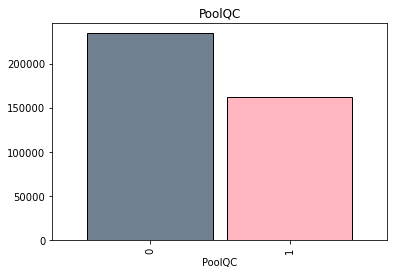

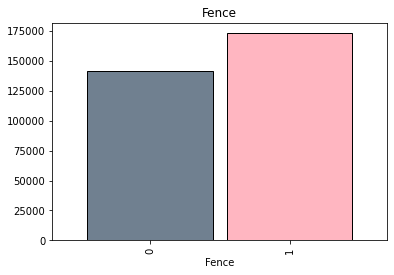

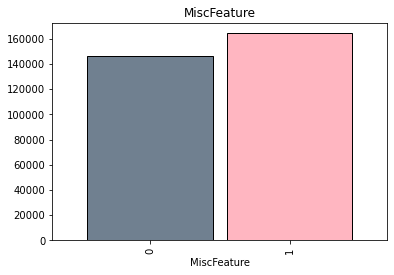

In [96]:
for feature in missing_var:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar(color=["slategray","lightpink"],edgecolor="k",width=0.9)
    plt.title(feature)
    plt.show()

* Here with the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

## Numerical Variables

In [238]:
# list of numerical variables
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(num_var))

# visualise the numerical variables
df[num_var].head()

Number of numerical variables:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

## Temporal Variables(i.e. DateTime Variables)
* From the Dataset above we have 4 year variables. We can extract information from the datetime variables like no of years or no of days.

In [239]:
# list of variables that contain year information
temp_var = [feature for feature in num_var if 'Yr' in feature or 'Year' in feature]
temp_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [169]:
# let's explore the content of these year variables
for feature in temp_var:
    print(feature,"\n",df[feature].unique())
    print("-"*50)

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
--------------------------------------------------
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
------------------------------------------

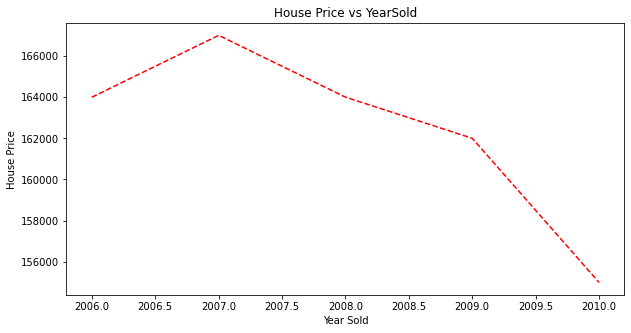

In [45]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

plt.figure(figsize=(10,5))
df.groupby('YrSold')['SalePrice'].median().plot(linestyle="--",c="r")
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.title("House Price vs YearSold")
plt.show()

* As we can see, initially the house price is increasing with the year the house was sold, but soon after saleprice is decreasing,
we will see the reason behind it in further observations.

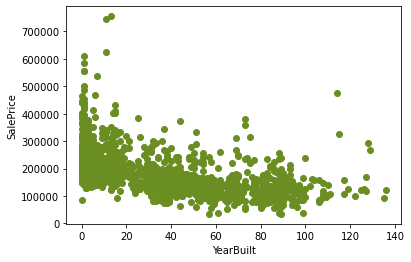

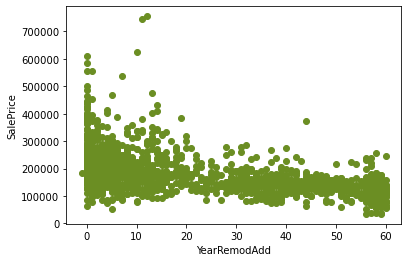

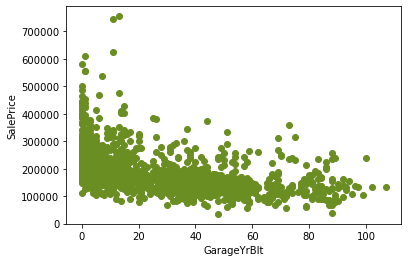

In [48]:
# We will capture the difference between year variable and year the house was sold for and then compare it with the Saleprice.
for feature in temp_var:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'],c="olivedrab")
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()      

* As we see from the above observation, if the house is built in recent year the `saleprice` is significantly high and as the `built_year`
increses the saleprice is decreasing, similarly goes with `year modification` and `garage year built`, as number of year in which modification
was done increases, `saleprice` decreases.

## Discrete Numerical Features

In [240]:
dis_var=[feature for feature in num_var if len(df[feature].unique())<25 and feature not in temp_var+['Id']]
print("Discrete Variables Count: {}".format(len(dis_var)))

Discrete Variables Count: 17


In [101]:
print(dis_var)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [102]:
df[dis_var].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

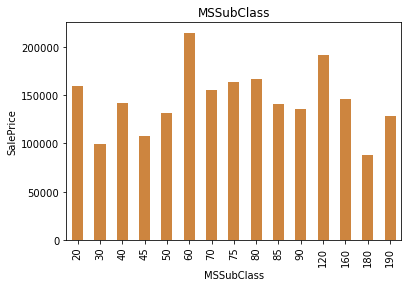

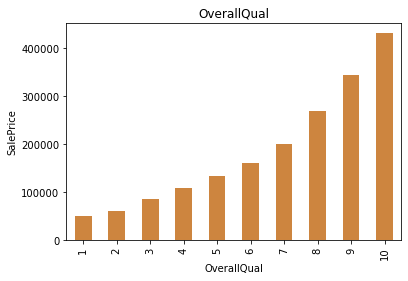

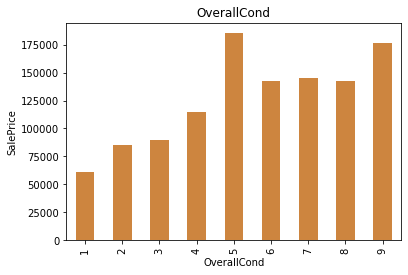

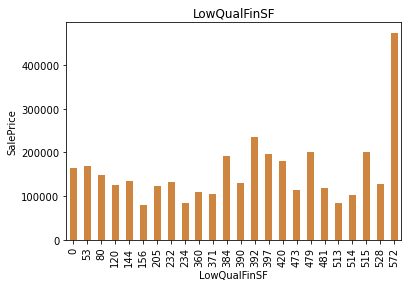

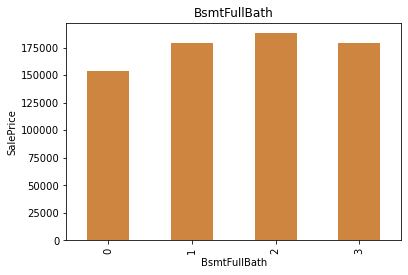

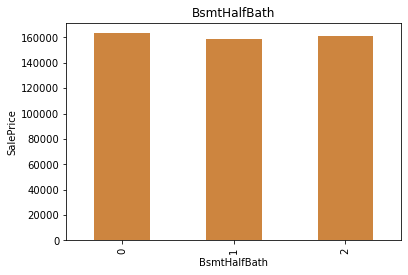

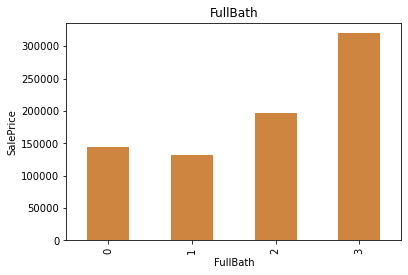

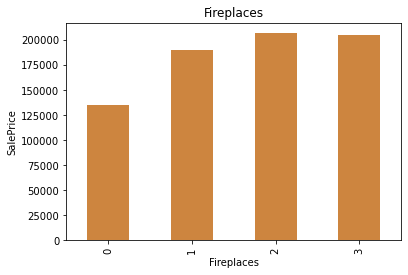

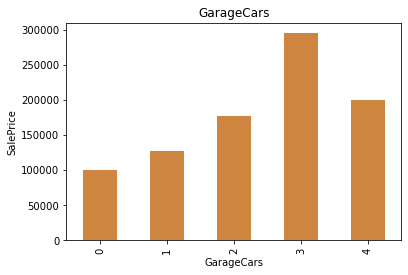

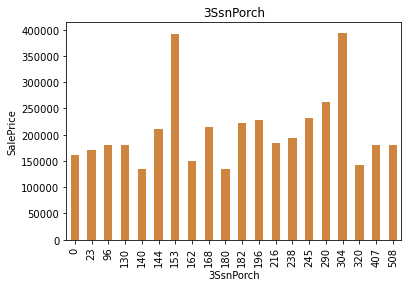

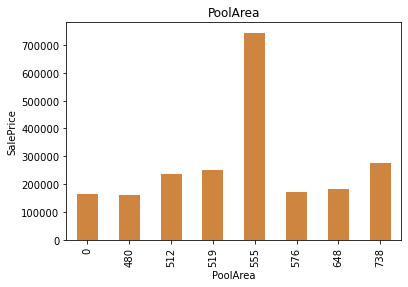

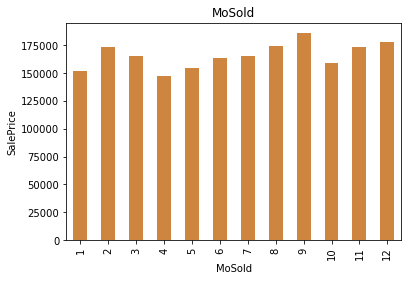

In [52]:
## Lets find the realtionship between discrete variables and Saleprice
for feature in dis_var:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color="peru")
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

* As we can see, in each variable some categories have significant relationship with the target variable,i.e, `SalePrice`.

## Continuous Variable

In [241]:
cont_var=[feature for feature in num_var if feature not in dis_var+temp_var+['Id']]
print("Continuous feature Count {}".format(len(cont_var)))

Continuous feature Count 16


In [105]:
df[cont_var].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

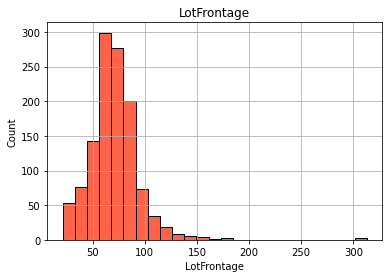

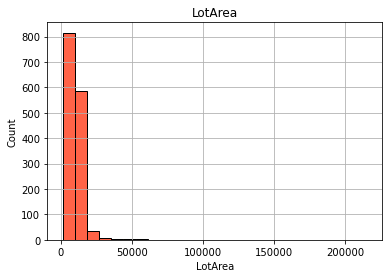

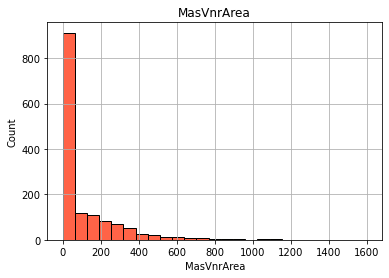

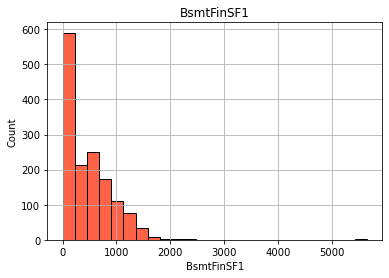

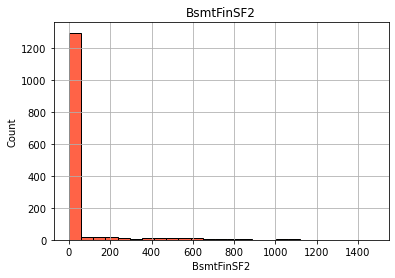

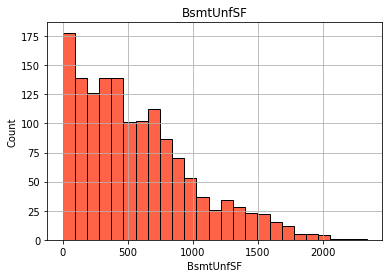

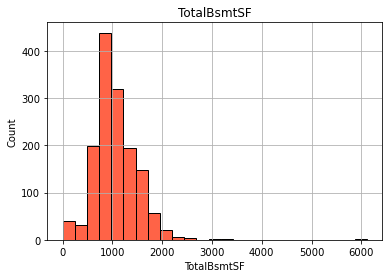

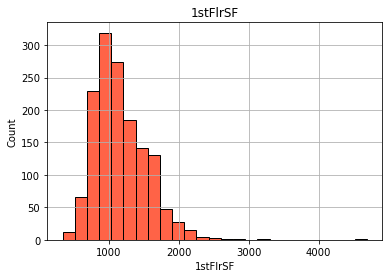

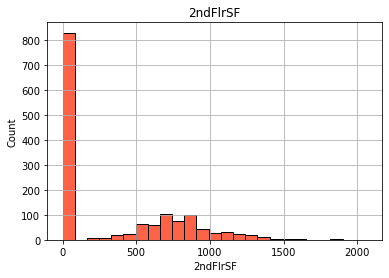

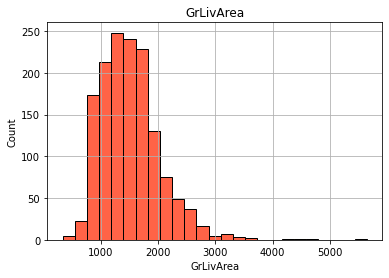

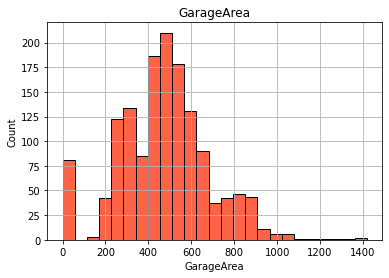

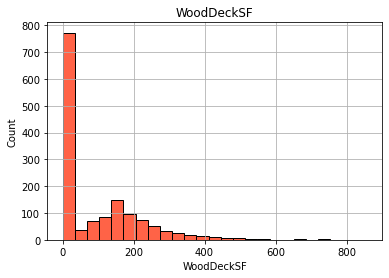

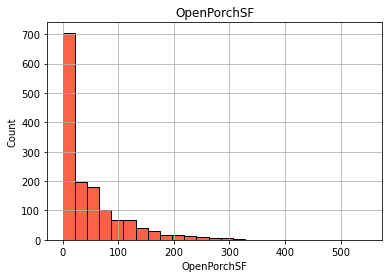

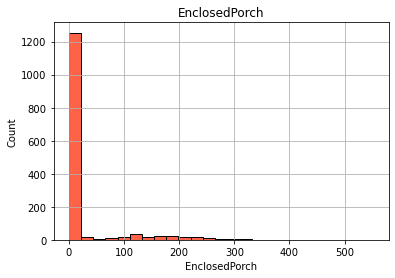

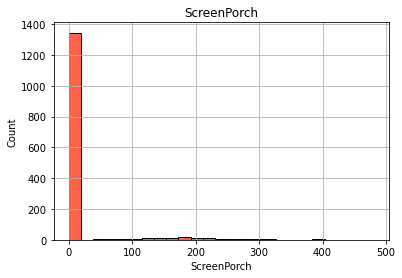

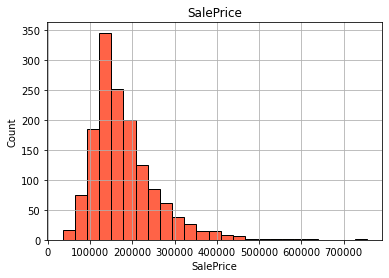

In [67]:
## Lets analyse the continuous values by creating histograms to understand the distribution of data
for feature in cont_var:
    data=df.copy()
    data[feature].hist(bins=25,color="tomato",ec="k")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

* From the above figure we can see that some features follow normal distribution and some are skewed, we need to transform data
for better analysis

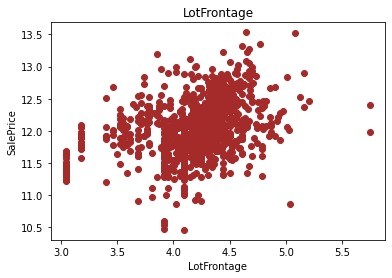

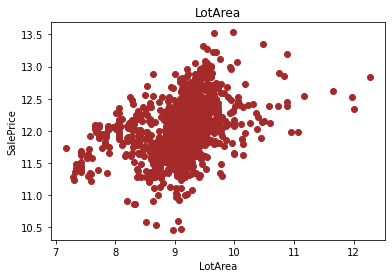

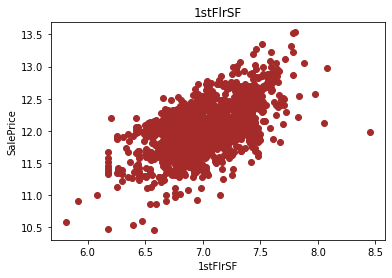

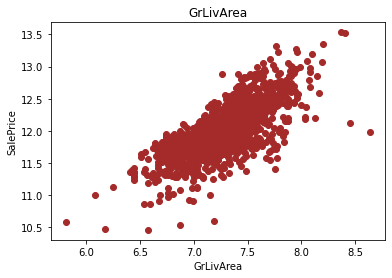

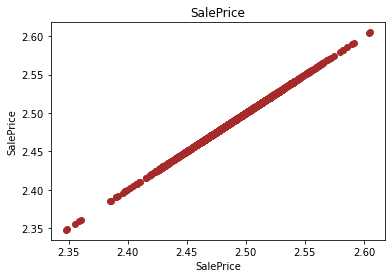

In [60]:
## Using logarithmic transformation
for feature in cont_var:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data["SalePrice"]=np.log(data["SalePrice"])
        plt.scatter(data[feature],data["SalePrice"],color="brown")
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

* As we can see there is a montotonic relationship between the features and the Saleprice after using logarithmic transformation.

## Outliers

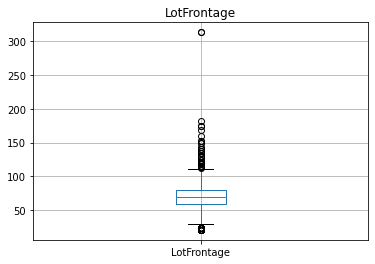

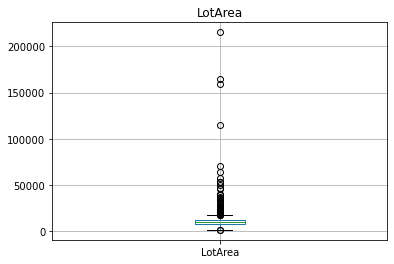

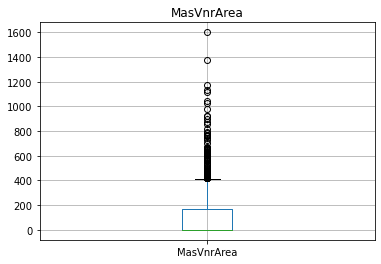

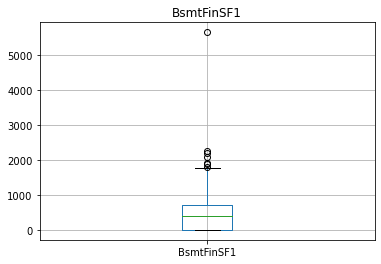

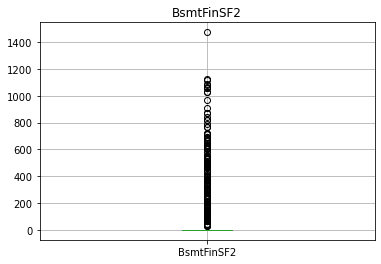

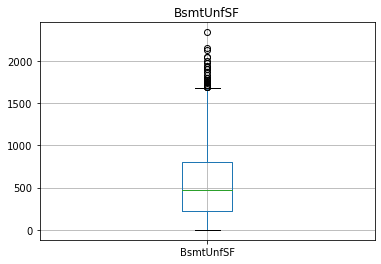

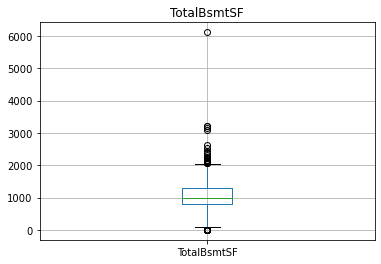

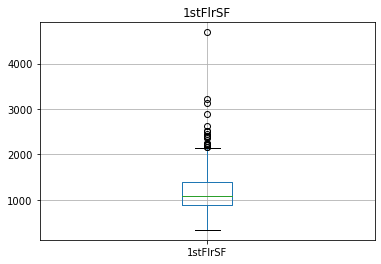

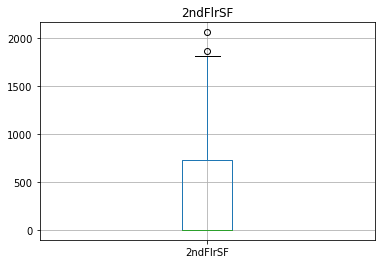

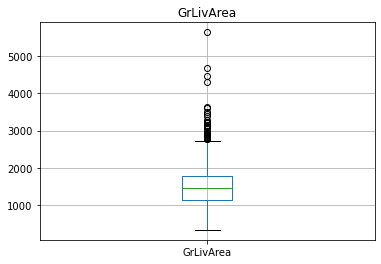

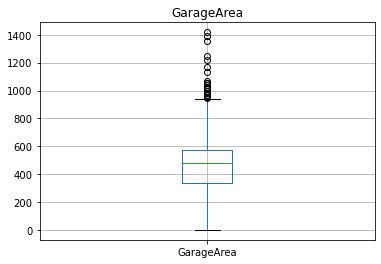

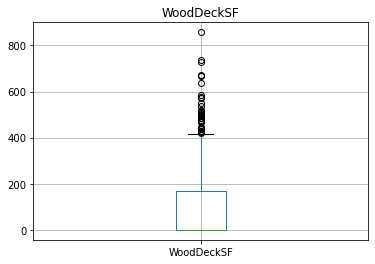

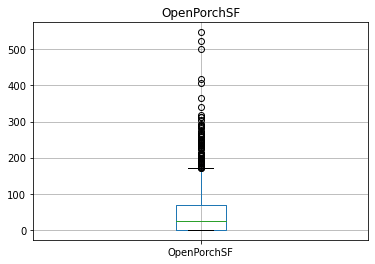

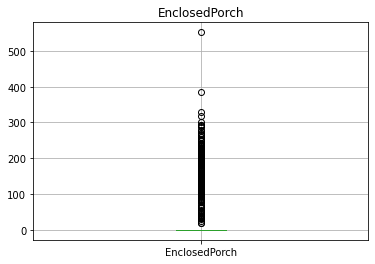

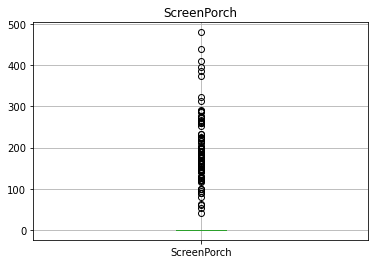

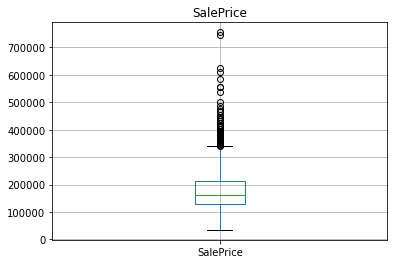

In [61]:
for feature in cont_var:
    data=df.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

* As we can see there are many outliers in almost every feature.

## Categorical Variables

In [242]:
cat_var=[feature for feature in df.columns if df[feature].dtypes=='O']
print("Continuous feature Count {}".format(len(cat_var)))

Continuous feature Count 43


In [107]:
df[cat_var].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [108]:
for feature in cat_var:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

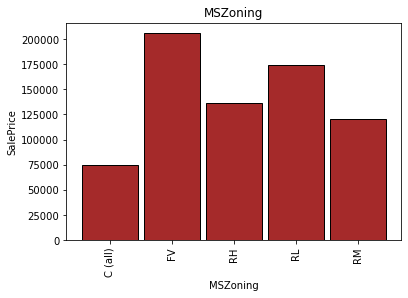

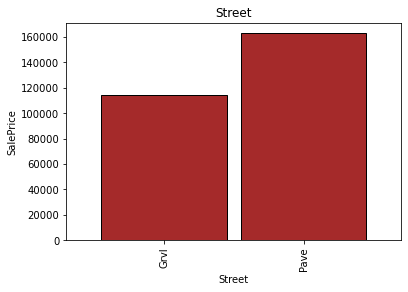

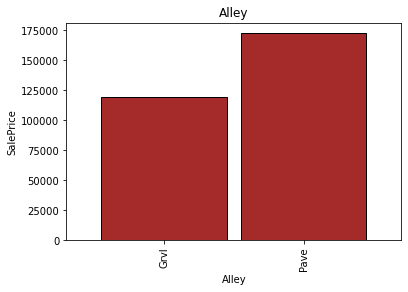

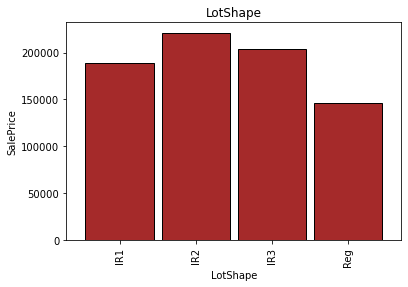

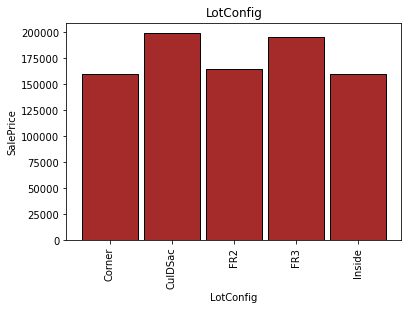

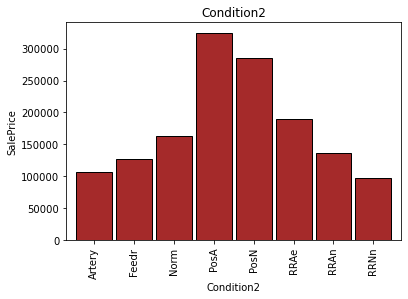

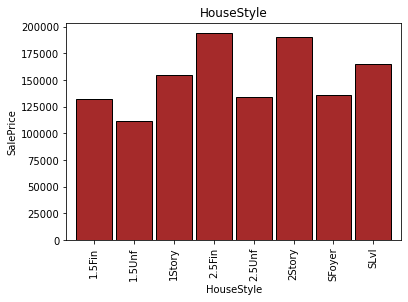

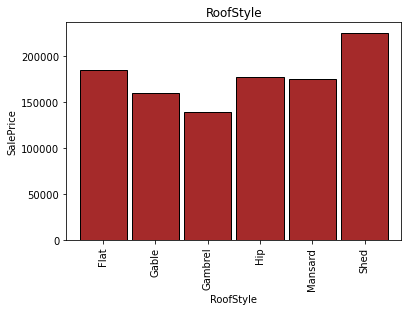

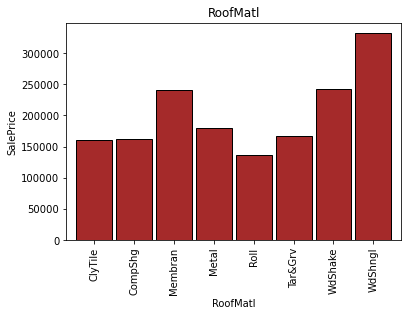

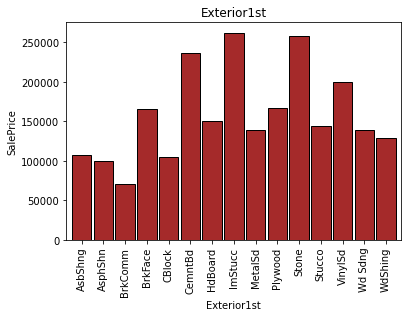

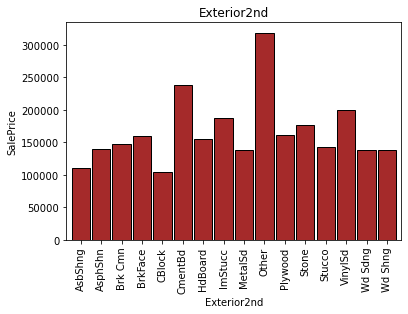

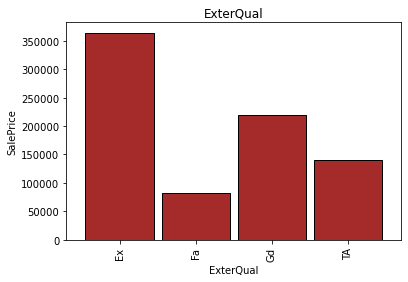

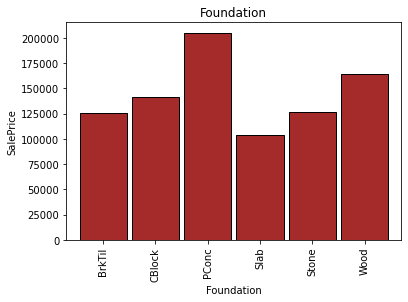

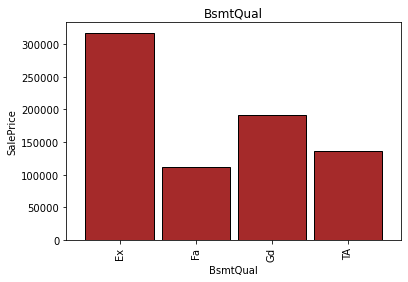

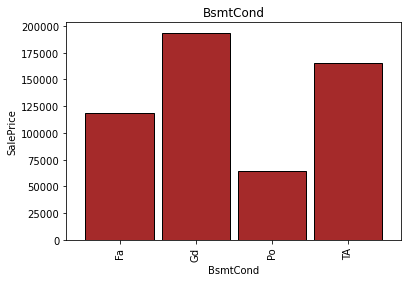

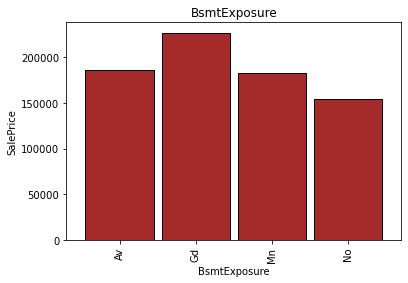

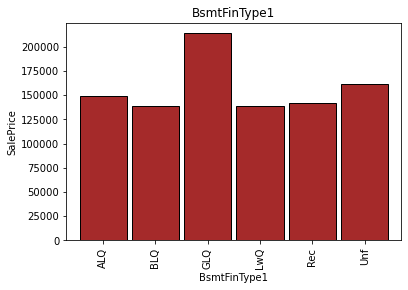

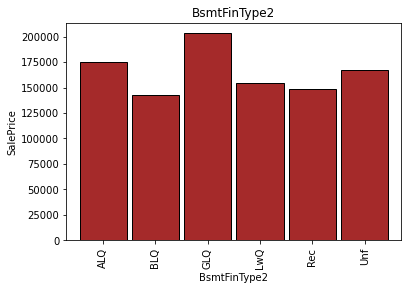

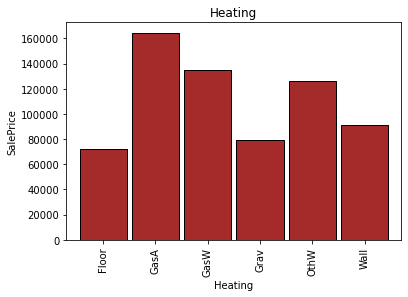

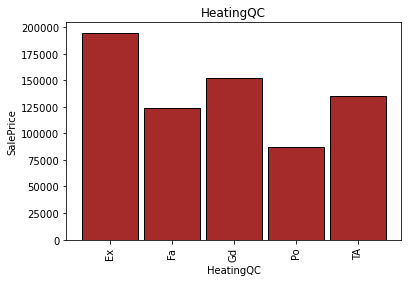

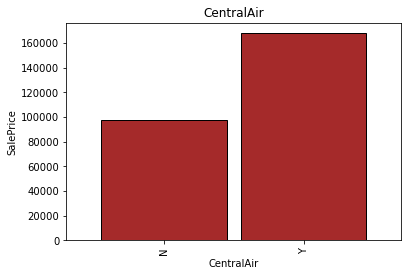

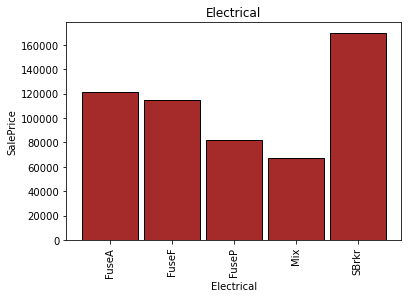

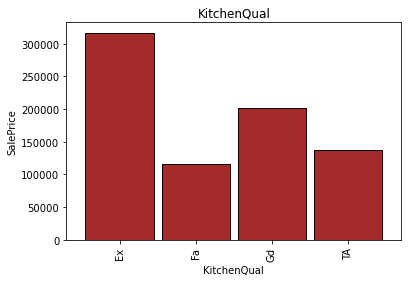

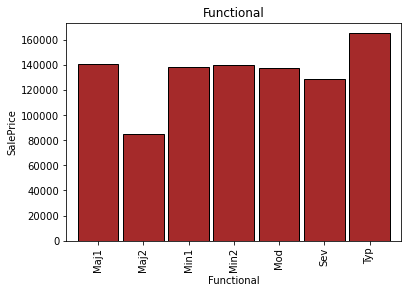

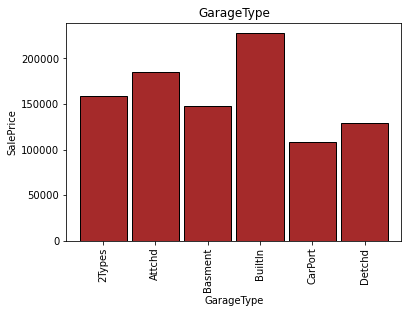

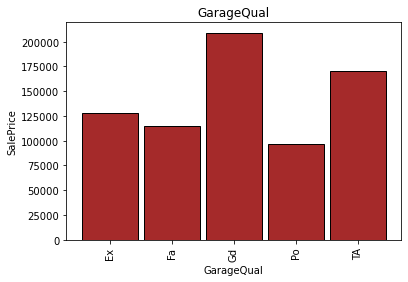

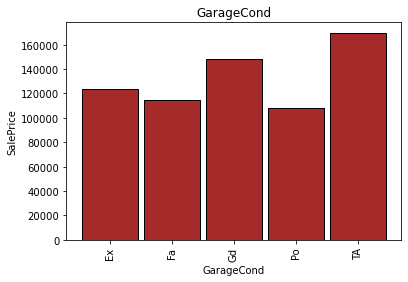

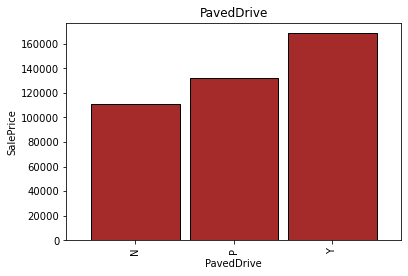

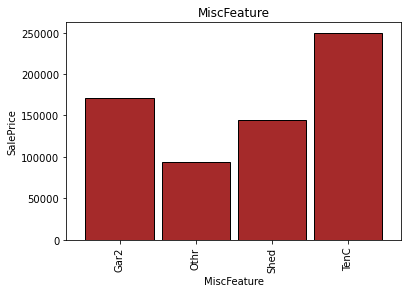

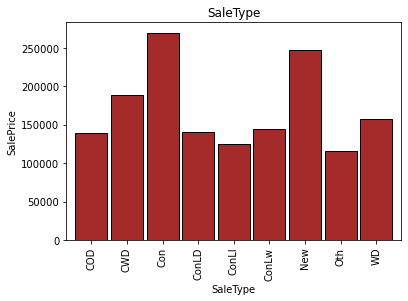

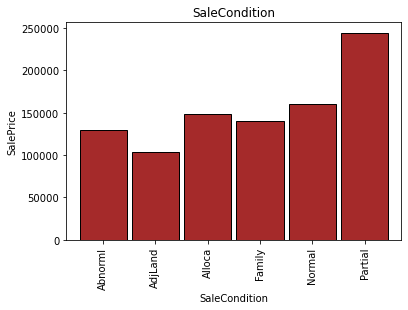

In [66]:
## Finding out the relationship between categorical variable and dependent feature SalesPrice
for feature in cat_var:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color="brown",width=0.9,ec="k")
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

### Dealing with the Missing Data

In [243]:
print(missing_var)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [244]:
missing_var = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
for i in missing_var:
    print(i,"-"*10,df[i].isna().sum(),"missing values","-"*10,round(df[i].isna().mean()*100,4),"% missing values")

LotFrontage ---------- 259 missing values ---------- 17.7397 % missing values
Alley ---------- 1369 missing values ---------- 93.7671 % missing values
MasVnrType ---------- 8 missing values ---------- 0.5479 % missing values
MasVnrArea ---------- 8 missing values ---------- 0.5479 % missing values
BsmtQual ---------- 37 missing values ---------- 2.5342 % missing values
BsmtCond ---------- 37 missing values ---------- 2.5342 % missing values
BsmtExposure ---------- 38 missing values ---------- 2.6027 % missing values
BsmtFinType1 ---------- 37 missing values ---------- 2.5342 % missing values
BsmtFinType2 ---------- 38 missing values ---------- 2.6027 % missing values
Electrical ---------- 1 missing values ---------- 0.0685 % missing values
FireplaceQu ---------- 690 missing values ---------- 47.2603 % missing values
GarageType ---------- 81 missing values ---------- 5.5479 % missing values
GarageYrBlt ---------- 81 missing values ---------- 5.5479 % missing values
GarageFinish --------

* Some features of `Basement` types like `BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2` have almost same number
of missing values corresponding to same set of observations, thats why its better to drop them. Same goes with `Garage` and
`ManVnr` type varibales. Moreover some features like `MiscFeature, PoolQC, Fence Alley` have very high number of missing values and thus making them useless so its better to drop them.

In [245]:
features = ['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [246]:
df.drop(features,axis=1,inplace=True)

In [247]:
df.isna().sum().sort_values(ascending=False)[:4]

LotFrontage    259
Electrical       1
Fireplaces       0
1stFlrSF         0
dtype: int64

In [248]:
# handling Electrical variable
df["Electrical_nan"]=np.where(df["Electrical"].isnull(),1,0)
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])

In [249]:
# handling LotFrontage variable
df['LotFrontage_nan']=np.where(df["LotFrontage"].isnull(),1,0)
df["LotFrontage"].fillna(df["LotFrontage"].median(),inplace=True)

In [250]:
# rechecking null values
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
feature_with_nan

[]

In [251]:
df.shape

(1460, 66)

* Now we left with 66 variables only after dropping.

# Univariate Analysis

In [253]:
# descriptive statistical summary of saleprice
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

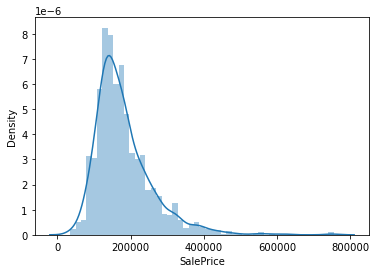

In [254]:
# Analysis of SalePrice
sns.distplot(df["SalePrice"])
plt.show()

* As we see data is rightly skewed, so needed transformation to normal distribution.

In [255]:
# Skewness and Kurtosis
print("Skewness : %f" % df["SalePrice"].skew())
print("Kurtosis : %f" % df["SalePrice"].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


# Bivariate Analysis and Treating Outliers

In [256]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'Electrical_nan', 'LotFrontage_nan'],
    

In [257]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!="O" and feature not in temp_var+dis_var+["Id"]]
print(numerical_features)

['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'Electrical_nan', 'LotFrontage_nan']


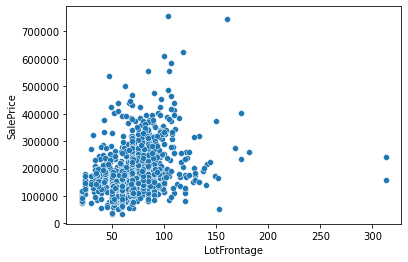

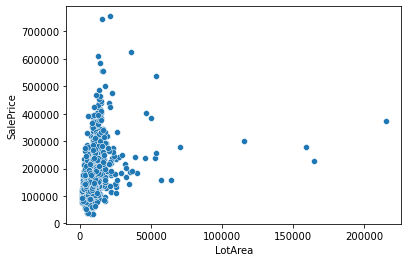

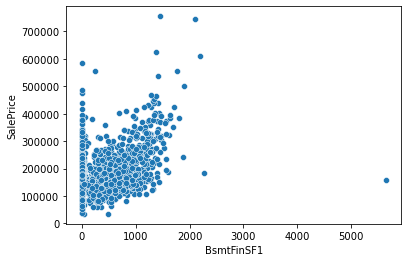

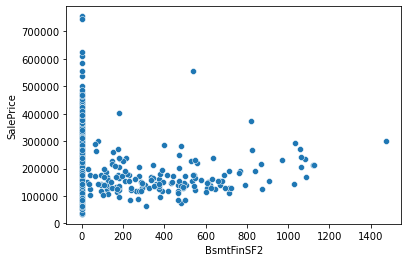

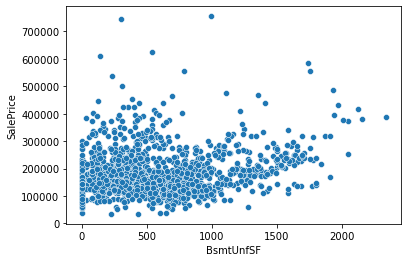

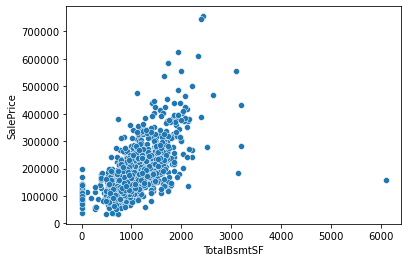

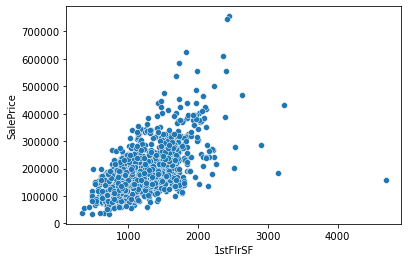

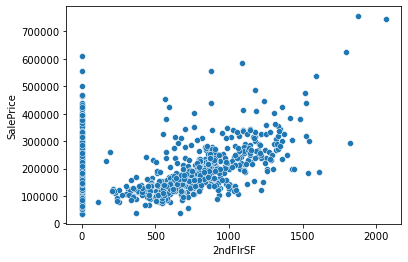

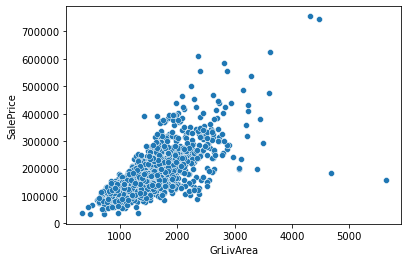

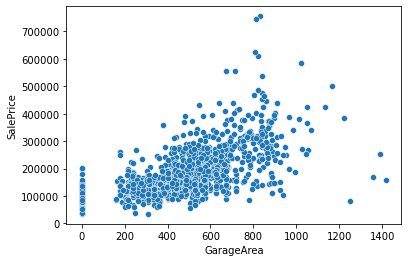

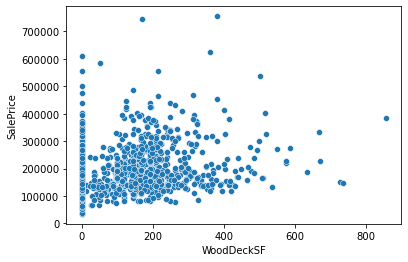

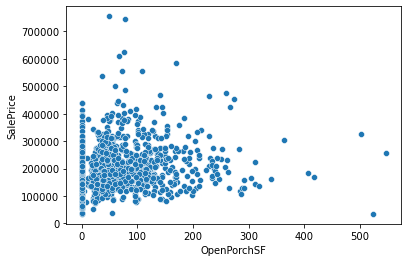

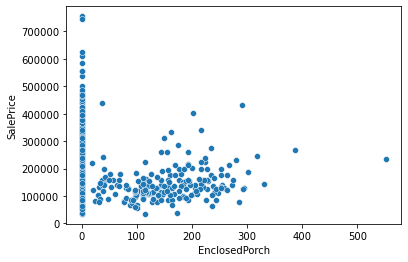

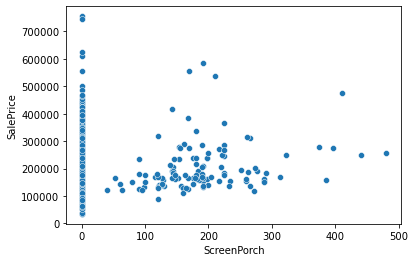

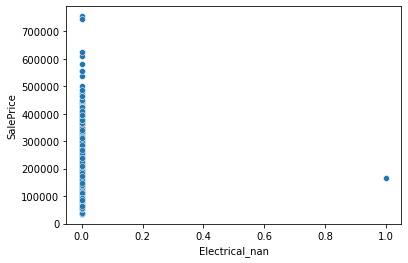

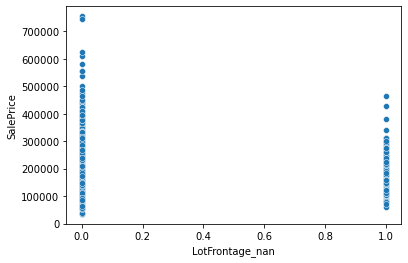

In [258]:
for i in numerical_features:
    sns.scatterplot(df[i],df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.show()

* As we can see from the above obsevation that some features have monotonic relationbship with the `SalePrice` but some 
are having outliers with them.

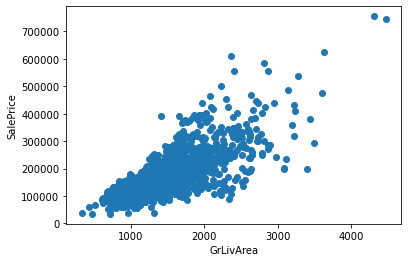

In [199]:
# bivariate analysis : Saleprice V/s GrLivArea
plt.scatter(df["GrLivArea"],df["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

* As we can see there is monotonic relationship between `GrLivArea` and `SalePrice` but it is observed that for 2 points, 
as `GrLivArea` is increasing `SalePrice` is decreasing, so it is considered as outliers. We are going to remove the outliers 
as it may impact the analysis.

In [259]:
df.sort_values("GrLivArea",ascending=False)[:2]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299          60       RL        313.0    63887   Pave      IR3   
523    524          60       RL        130.0    40094   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1298       Norm     1Fam     2Story           10            5       2008   
523        PosN     1Fam     2Story           10            5       2007   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual  \
1298          2008       Hip  ClyTile      Stucco      Stucco        Ex   
523           2008       Hip  CompShg     CemntBd     CmentBd        Ex   

     ExterCond Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1298        TA      PConc        5644           0        466         6110   
523         TA      PConc        2260           0        878         3138   

     Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1298    GasA        Ex          Y      SBrkr      4692       950   
523     GasA        Ex          Y      SBrkr      3138      1538   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1298             0       5642             2             0         2         1   
523              0       4676             1             0         3         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1298             3             1          Ex            12        Typ   
523              3             1          Ex            11        Typ   

      Fireplaces  GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  \
1298           3           2        1418          Y         214          292   
523            1           3         884          Y         208          406   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1298              0          0            0       480        0       1   
523               0          0            0         0        0      10   

      YrSold SaleType SaleCondition  SalePrice  Electrical_nan  \
1298    2008      New       Partial     160000               0   
523     2007      New       Partial     184750               0   

      LotFrontage_nan  
1298                0  
523                 0

In [260]:
# deleting outliers
df=df.drop(df[df["Id"] == 1299].index)
df=df.drop(df[df["Id"] == 524].index)

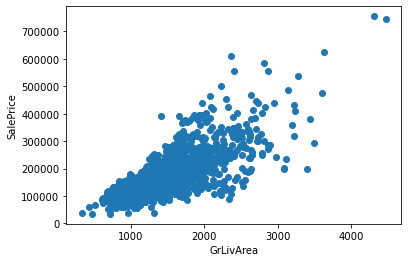

In [261]:
plt.scatter(df["GrLivArea"],df["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### Similarly we can remove outliers for other variables

In [262]:
features_with_ouliers = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2','TotalBsmtSF', '1stFlrSF', 'EnclosedPorch']

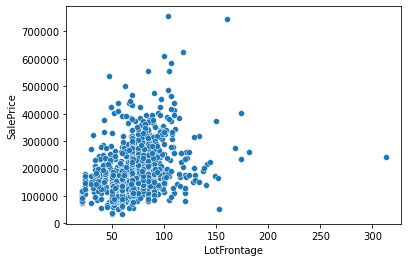

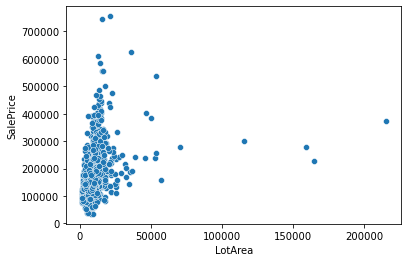

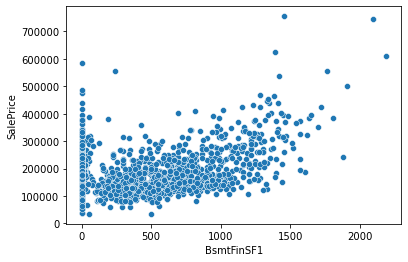

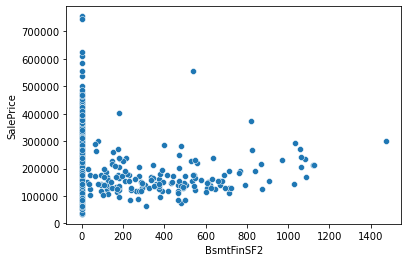

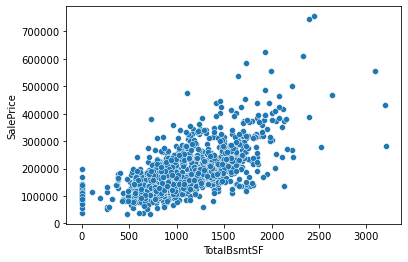

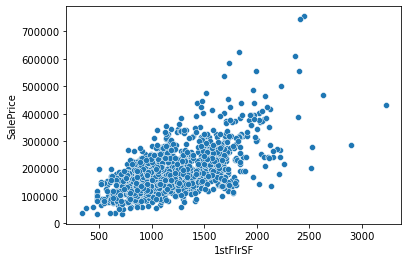

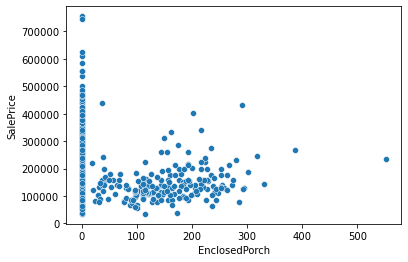

In [263]:
# Scatterplot between Variables and Saleprice
for i in features_with_ouliers:
    sns.scatterplot(df[i],df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.show()

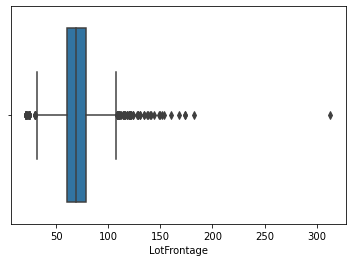

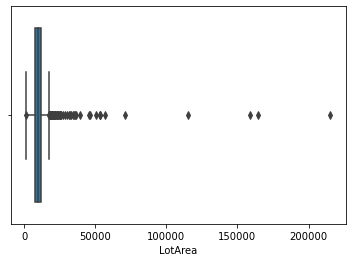

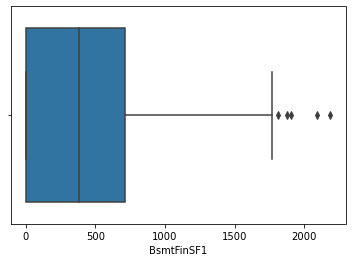

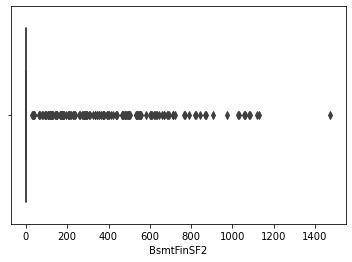

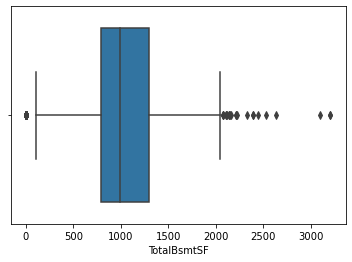

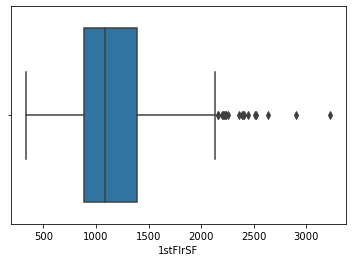

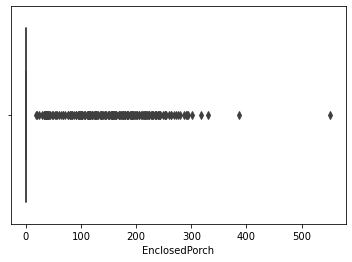

In [264]:
# Boxplot
for i in features_with_ouliers:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [265]:
df["LotFrontage"].sort_values(ascending=False)[:2]

934     313.0
1127    182.0
Name: LotFrontage, dtype: float64

In [266]:
# deleting outliers for LotFrontage
df.drop(934,inplace=True)

In [267]:
df["LotArea"].sort_values(ascending=False)[:5]

313    215245
335    164660
249    159000
706    115149
451     70761
Name: LotArea, dtype: int64

In [269]:
# deleting outliers for LotArea# deleting outliers for LotArea
df.drop([313,335,249,706],inplace=True)

KeyError: '[313, 335, 249, 706] not found in axis'

In [270]:
df["BsmtFinSF2"].sort_values(ascending=False)[:2]

322    1474
542    1127
Name: BsmtFinSF2, dtype: int64

In [271]:
# deleting outliers for BsmtFinSF2
df.drop(322,inplace=True)

In [272]:
df["TotalBsmtSF"].sort_values(ascending=False)[:4]

332     3206
496     3200
440     3094
1373    2633
Name: TotalBsmtSF, dtype: int64

In [273]:
# deleting outliers for TotalBsmtSF
df.drop([332,496],inplace=True)

In [274]:
df["EnclosedPorch"].sort_values(ascending=False)[:4]

197     552
747     386
1197    330
939     318
Name: EnclosedPorch, dtype: int64

In [275]:
# deleting outliers for EnclosedPorch
df.drop([197],inplace=True)

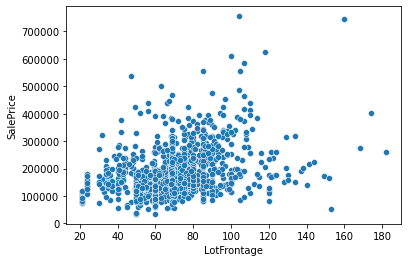

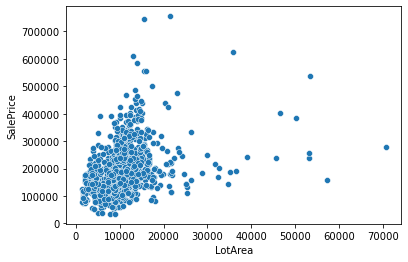

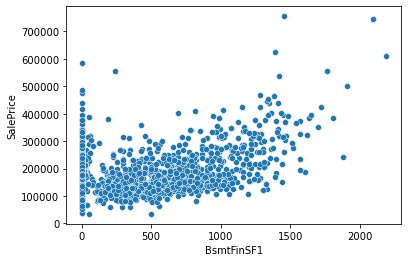

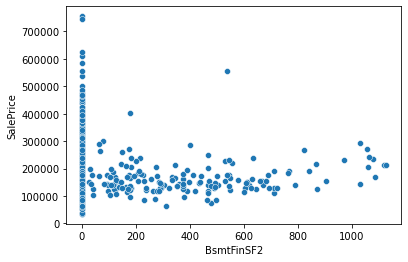

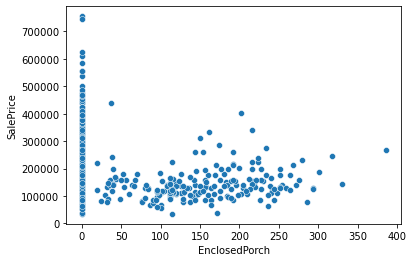

In [276]:
# Scatterplot between Variables and Saleprice after removing outliers
for i in features_with_ouliers:
    sns.scatterplot(df[i],df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.show()

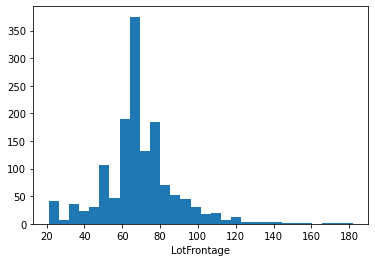

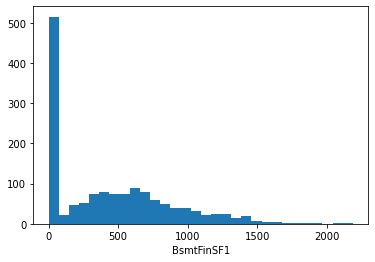

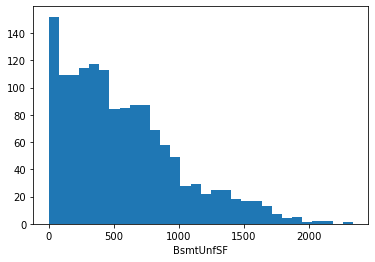

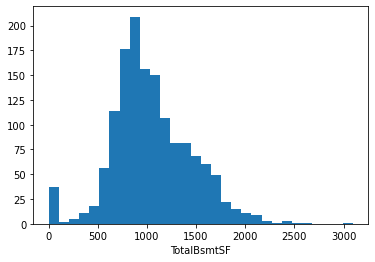

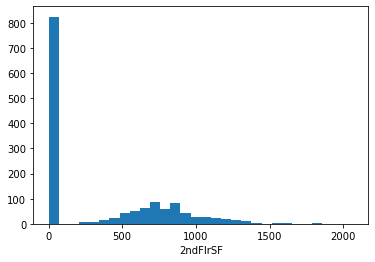

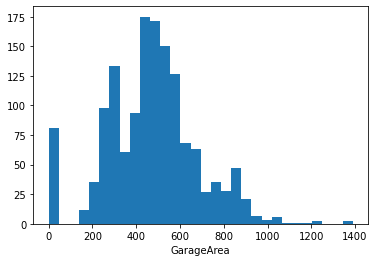

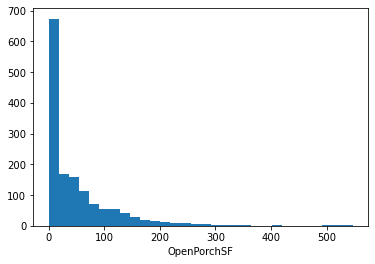

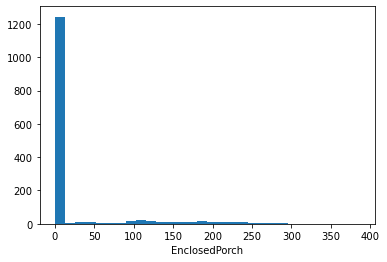

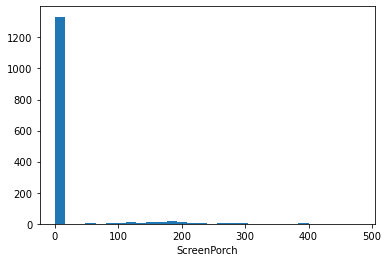

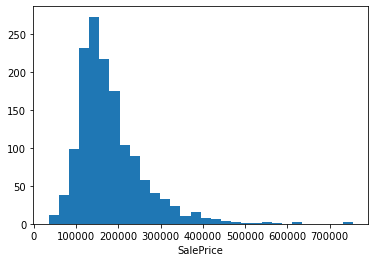

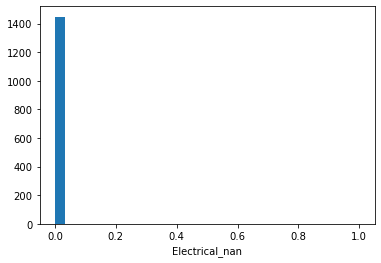

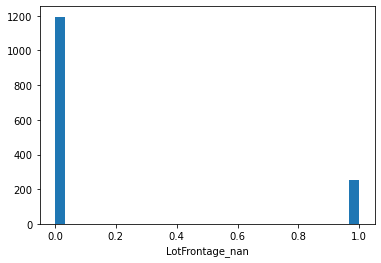

In [283]:
# Histogram of Continuous Features
for i in numerical_features:
    plt.hist(df[i],bins=30)
    plt.xlabel(i)
    plt.show()

#### Since some numerical variables are skewed, so we will perform log normal distribution

In [288]:
for i in numerical_features:
    if i!="Electrical_nan" and i!="LotFrontage_nan":
        if 0 in df[i].unique():
            pass
        else:
            df[i]=np.log(df[i])

In [289]:
df[numerical_features][:4]

LotFrontage   LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     4.174387  9.041922         706           0        150          856   
1     4.382027  9.169518         978           0        284         1262   
2     4.219508  9.328123         486           0        434          920   
3     4.094345  9.164296         216           0        540          756   

   1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  \
0  6.752270       854   7.444249         548           0           61   
1  7.140453         0   7.140453         460         298            0   
2  6.824374       866   7.487734         608           0           42   
3  6.867974       756   7.448334         642           0           35   

   EnclosedPorch  ScreenPorch  SalePrice  Electrical_nan  LotFrontage_nan  
0              0            0  12.247694               0                0  
1              0            0  12.109011               0                0  
2              0            0  12.317167               0                0  
3            272            0  11.849398               0                0

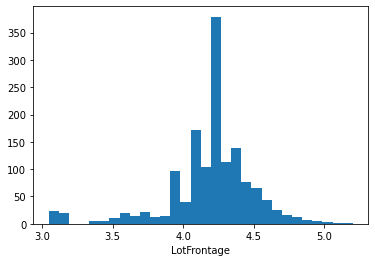

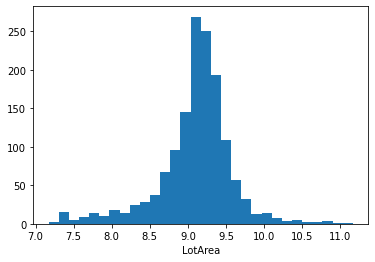

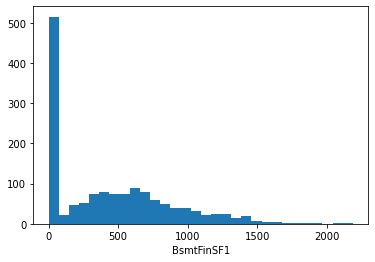

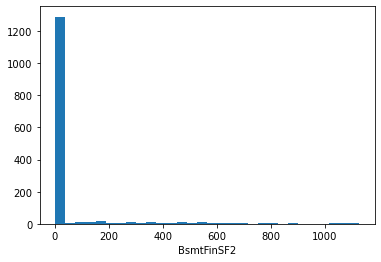

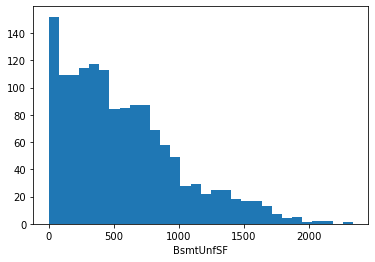

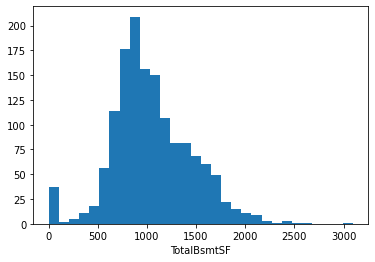

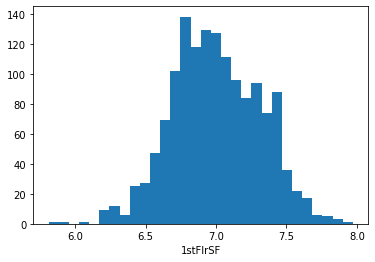

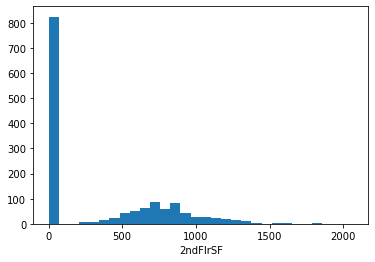

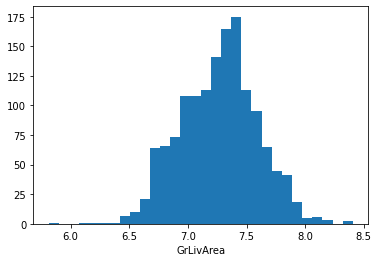

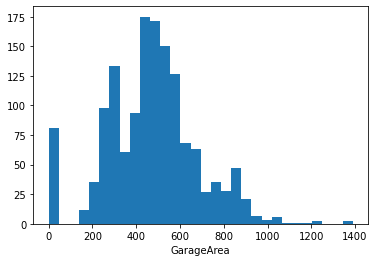

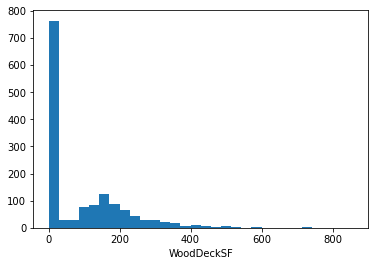

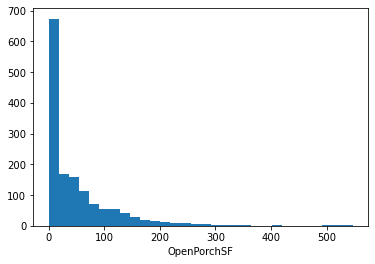

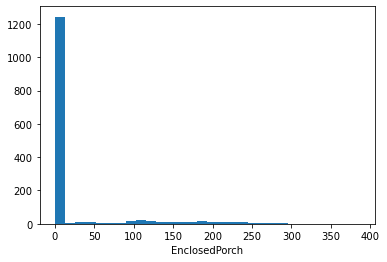

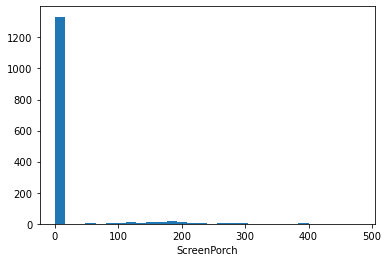

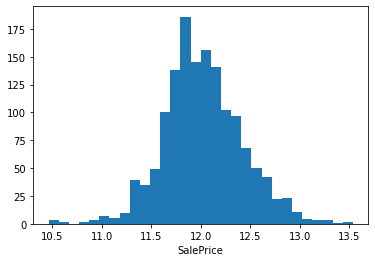

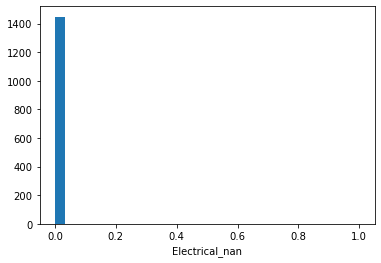

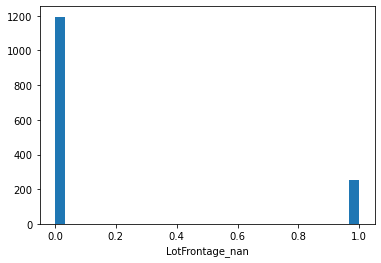

In [290]:
# Histogram of Continuous Features after Logarithmic Transformation
for i in numerical_features:
    plt.hist(df[i],bins=30)
    plt.xlabel(i)
    plt.show()

# Multivariate Analysis

<AxesSubplot:>

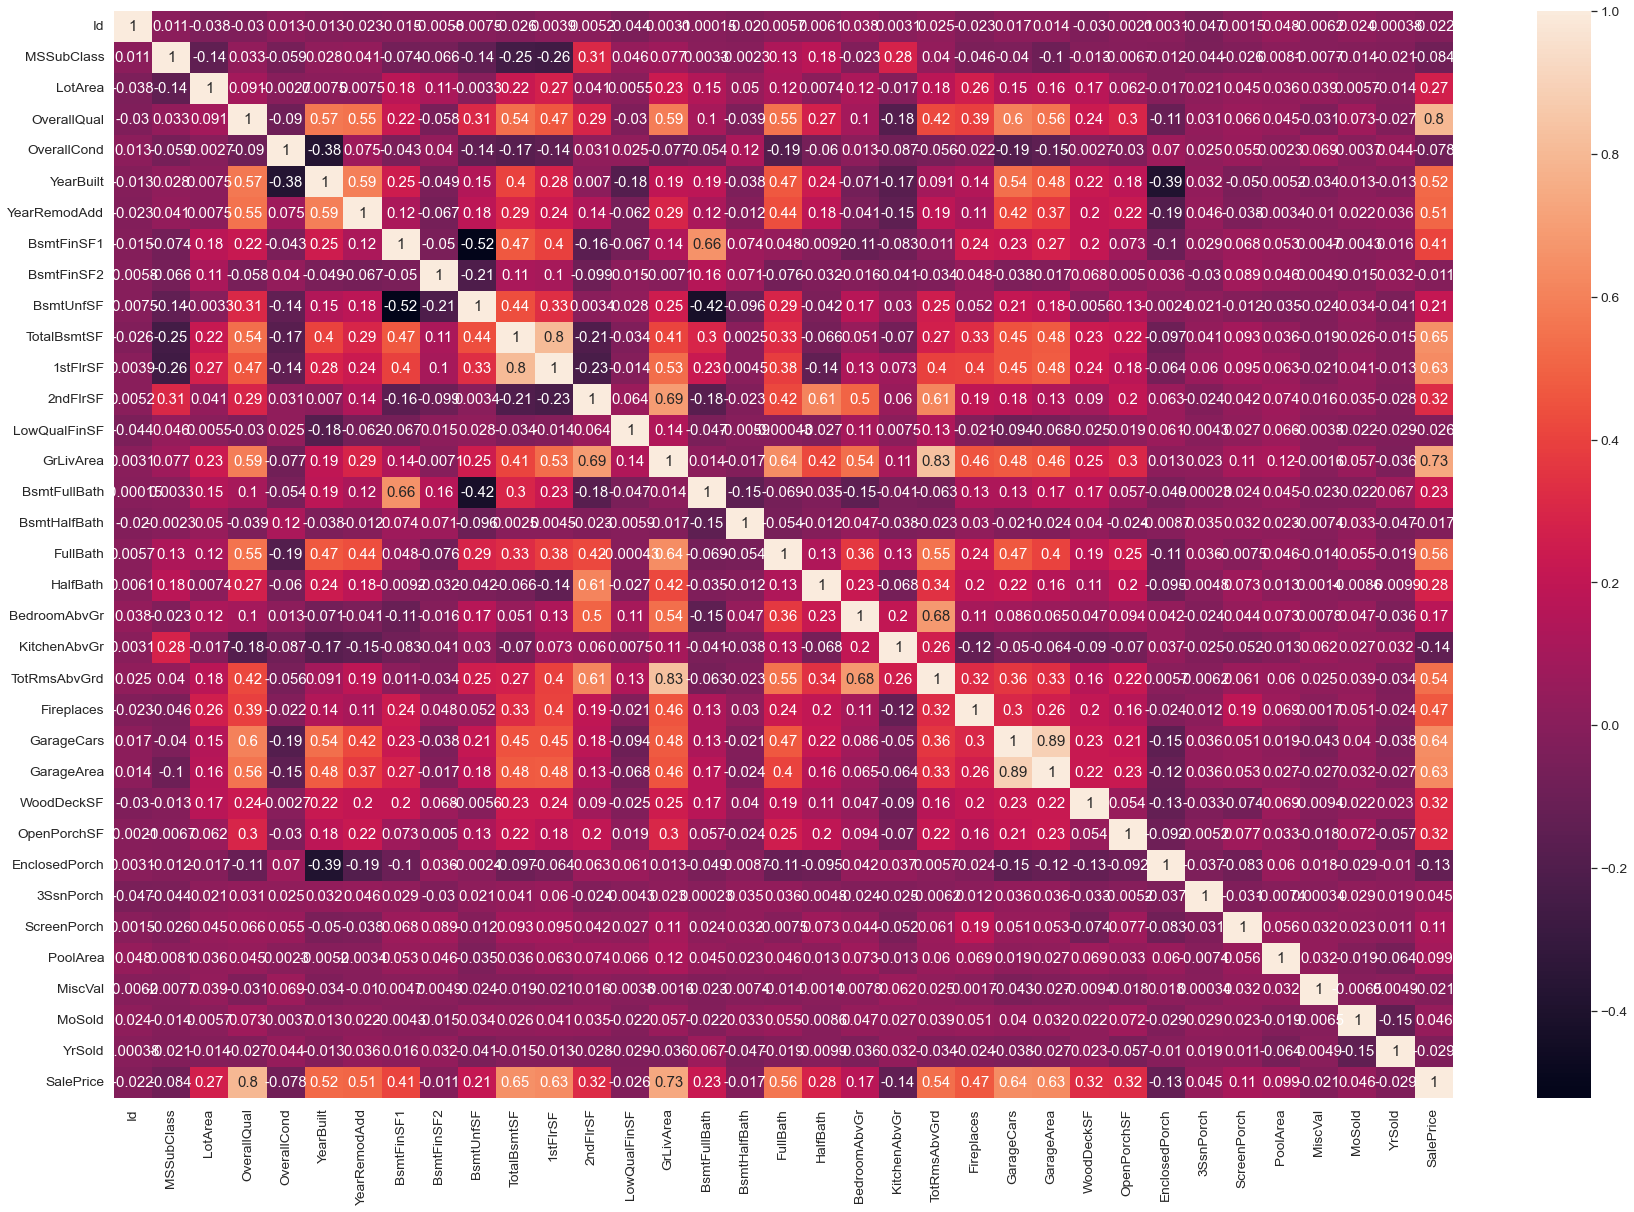

In [57]:
# Co-relation Matrix
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

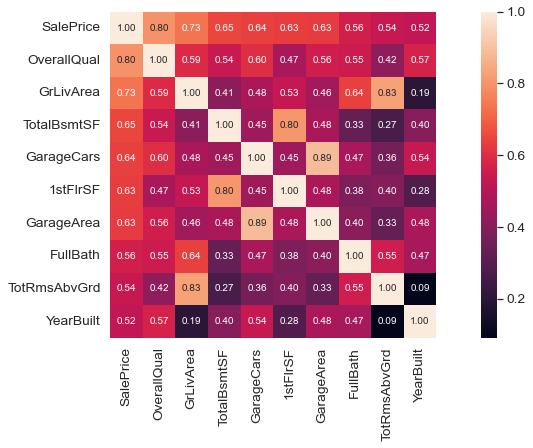

In [63]:
# saleprice correlation matrix
plt.figure(figsize=(16,6))
k = 10 # number of variables for heatmap
corrmat = df.corr()
cols=corrmat.nlargest(k,"SalePrice")["SalePrice"].index
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

* We have taken 10 largest features which are co-related with each other.
* As we can see `GrLivArea` is highly co-related with `TotRmsAbvGrd`.
* `GrLivArea`,`OverallQual` are highly co-related with `SalePrice`.
* `TotalBsmtSF` and `1stFlrSF` are highly co-related.
* `GarageCars` and `GarageArea` are highly co-related.

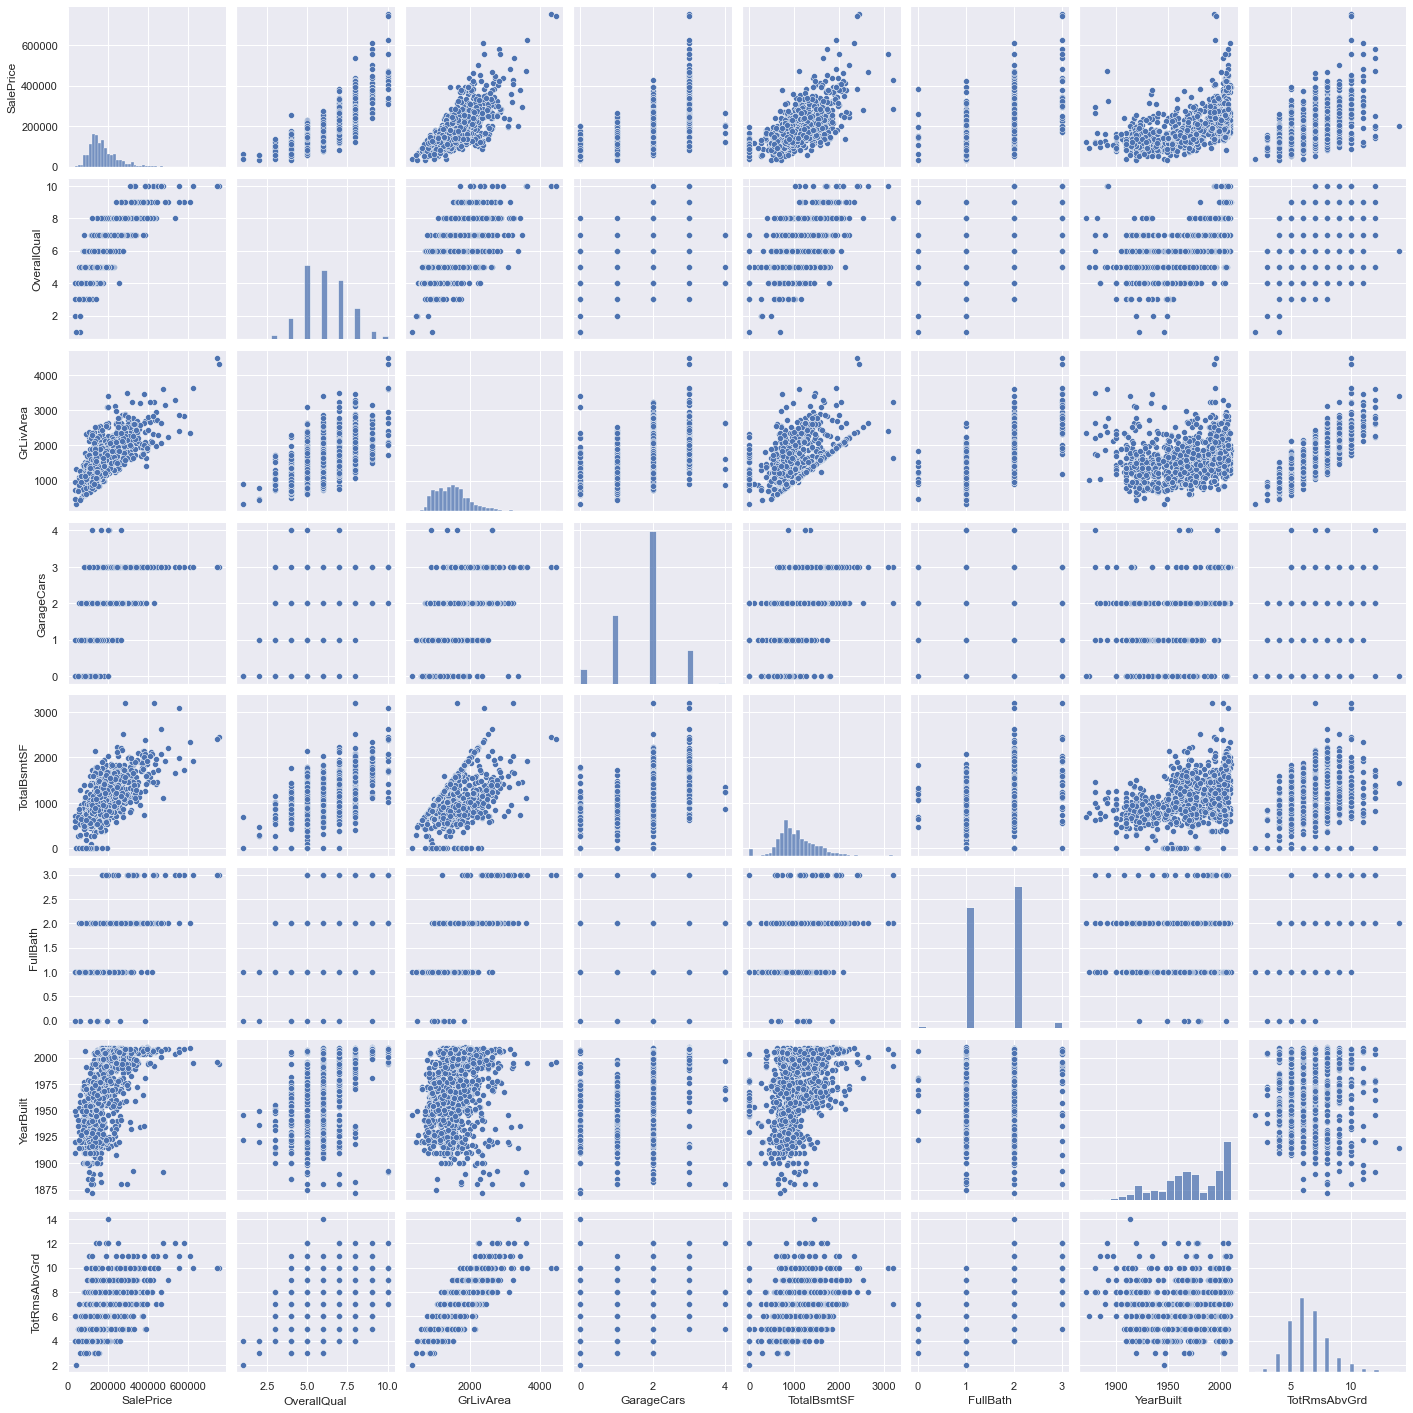

In [86]:
# scatterplot
sns.set()
cols=["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt","TotRmsAbvGrd"]
sns.pairplot(df[cols],size=2.5)
plt.show()

### Handling Temporal Variables (Date Time Variables)

In [295]:
for feature in ['YearBuilt','YearRemodAdd']:
       df[feature]=df['YrSold']-df[feature]

In [296]:
df[['YearBuilt','YearRemodAdd']].head()

YearBuilt  YearRemodAdd
0          5             5
1         31            31
2          7             6
3         91            36
4          8             8

### Handling Rare Categorical Feature
#### We will convert those categories of categorical variables that are present less than 1% of the observations to a new category : `Rare_var`

In [300]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(categorical_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [298]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [299]:
df.head(20)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
0    1          60       RL     4.174387  9.041922   Pave      Reg   
1    2          20       RL     4.382027  9.169518   Pave      Reg   
2    3          60       RL     4.219508  9.328123   Pave      IR1   
3    4          70       RL     4.094345  9.164296   Pave      IR1   
4    5          60       RL     4.430817  9.565214   Pave      IR1   
5    6          50       RL     4.442651  9.554993   Pave      IR1   
6    7          20       RL     4.317488  9.218705   Pave      Reg   
7    8          60       RL     4.234107  9.247829   Pave      IR1   
8    9          50       RM     3.931826  8.719317   Pave      Reg   
9   10         190       RL     3.912023  8.911934   Pave      Reg   
10  11          20       RL     4.248495  9.323669   Pave      Reg   
11  12          60       RL     4.442651  9.386308   Pave      IR1   
12  13          20       RL     4.234107  9.470240   Pave      IR2   
13  14          20       RL     4.510860  9.273503   Pave      IR1   
14  15          20       RL     4.234107  9.298351   Pave      IR1   
15  16          45       RM     3.931826  8.719317   Pave      Reg   
16  17          20       RL     4.234107  9.327323   Pave      IR1   
17  18          90       RL     4.276666  9.286468   Pave      Reg   
18  19          20       RL     4.189655  9.524786   Pave      Reg   
19  20          20       RL     4.248495  8.930626   Pave      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl     Rare_var      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW   Rare_var   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
5        Norm     1Fam     1.5Fin            5            5         16   
6        Norm     1Fam     1Story            8            5          3   
7        Norm     1Fam     2Story            7            6         36   
8        Norm     1Fam     1.5Fin            7            5         77   
9    Rare_var   2fmCon   Rare_var            5            6         69   
10       Norm     1Fam     1Story            5            5         43   
11       Norm     1Fam     2Story            9            5          1   
12       Norm     1Fam     1Story            5            

## Feature Transformation
#### Here we are using `Target Guided Ordinal Encoding` since eventually we are going to predict the Saleprice which is our Target variable.

In [303]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].median().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [304]:
df.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0   1          60         3     4.174387  9.041922       1         0   
1   2          20         3     4.382027  9.169518       1         0   
2   3          60         3     4.219508  9.328123       1         1   
3   4          70         3     4.094345  9.164296       1         1   
4   5          60         3     4.430817  9.565214       1         1   
5   6          50         3     4.442651  9.554993       1         1   
6   7          20         3     4.317488  9.218705       1         0   
7   8          60         3     4.234107  9.247829       1         1   
8   9          50         1     3.931826  8.719317       1         0   
9  10         190         3     3.912023  8.911934       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          1            16           2   
1            1          1          2          1            10           1   
2            1          1          0          1            16           2   
3            1          1          1          1            17           2   
4            1          1          2          1            21           2   
5            1          1          0          1             9           2   
6            1          1          0          1            18           2   
7            1          1          1          1            13           5   
8            1          1          0          1             3           0   
9            1          1          1          1             5           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   
5           1         3           1            5            5         16   
6           1         3           3            8            5          3   
7           1         3           5            7            6         36   
8           1         3           1            7            5         77   
9           0         0           0            5            6         69   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  ExterQual  \
0             5          0         0            9            9          2   
1            31          0         0            4            4          1   
2             6          0         0            9            9          2   
3            36          0         0            3            3          1   
4             8          0         0            9            9          2   
5            14          0         0            9            9          1   
6             2          0         0            9            9          2   
7            36          0         0            6            6          1   
8            58          0         0            7            3          1   
9            58          0         0            4            4          1   

   ExterCond  Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          3           4         706           0        150          856   
1          3           2         978           0        284         1262   
2          3           4         486           0        434          920   
3          3           1         216           0        540          756   
4          3           4         655           0        490         1145   
5          3           3         732           0         64          796   
6          3           4        1369           0        317         1686   
7          3           2         859          32        216         1

## Feature Scaling

In [310]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]
len(feature_scale)

64

In [311]:
print(feature_scale)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical_nan', 'LotFrontage_nan']


In [312]:
# importing MinMaxScaler from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [315]:
df[:3]

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0   1          60         3     4.174387  9.041922       1         0   
1   2          20         3     4.382027  9.169518       1         0   
2   3          60         3     4.219508  9.328123       1         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          1            16           2   
1            1          1          2          1            10           1   
2            1          1          0          1            16           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  ExterQual  \
0             5          0         0            9            9          2   
1            31          0         0            4            4          1   
2             6          0         0            9            9          2   

   ExterCond  Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          3           4         706           0        150          856   
1          3           2         978           0        284         1262   
2          3           4         486           0        434          920   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        2          4           1           3  6.752270       854   
1        2          4           1           3  7.140453         0   
2        2          4           1           3  6.824374       866   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0   7.444249             1             0         2         1   
1             0   7.140453             0             1         2         0   
2             0   7.487734             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            2             8           4   
1             3             1            1             6           4   
2             3             1            2             6           4   

   Fireplaces  GarageCars  GarageArea  PavedDrive  WoodDeckSF  OpenPorchSF  \
0           0           2         548           2           0           61   
1           1           2         460           2         298            0   
2           1           2         608           2           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SaleType  SaleCondition  SalePrice  Electrical_nan  LotFrontage_nan  
0         2              3  12.247694               0                0  
1         2              3  12.109011               0                0  
2         2              3  12.317167               0                0

In [316]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.fit_transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [317]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0   1  12.247694    0.235294      0.75     0.523210  0.468308     1.0   
1   2  12.109011    0.000000      0.75     0.619363  0.500232     1.0   
2   3  12.317167    0.235294      0.75     0.544105  0.539913     1.0   
3   4  11.849398    0.294118      0.75     0.486145  0.498925     1.0   
4   5  12.429216    0.235294      0.75     0.641956  0.599231     1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.5      0.727273   
1  0.000000     0.333333        1.0       0.50        0.5      0.454545   
2  0.333333     0.333333        1.0       0.00        0.5      0.727273   
3  0.333333     0.333333        1.0       0.25        0.5      0.772727   
4  0.333333     0.333333        1.0       0.50        0.5      0.954545   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.083333        0.0       0.0          0.9          0.9   
1   0.227941      0.516667        0.0       0.0          0.4          0.4   
2   0.051471      0.100000        0.0       0.0          0.9          0.9   
3   0.669118      0.600000        0.0       0.0          0.3          0.3   
4   0.058824      0.133333        0.0       0.0          0.9          0.9   

   ExterQual  ExterCond  Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   0.666667        1.0        1.00    0.322669         0.0   0.064212   
1   0.333333        1.0        0.50    0.446984         0.0   0.121575   
2   0.666667        1.0        1.00    0.222121         0.0   0.185788   
3   0.333333        1.0        0.25    0.098720         0.0   0.231164   
4   0.666667        1.0        1.00    0.299360         0.0   0.209760   

   TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0     0.276665      1.0       1.00         1.0         1.0  0.435580   
1     0.407886      1.0       1.00         1.0         1.0  0.615241   
2     0.297350      1.0       1.00         1.0         1.0  0.468951   
3     0.244344      1.0       0.75         1.0         1.0  0.489131   
4     0.370071      1.0       1.00         1.0         1.0  0.570211   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  0.413559           0.0   0.629245      0.333333           0.0  0.666667   
1  0.000000           0.0   0.512191      0.000000           0.5  0.666667   
2  0.419370           0.0   0.646000      0.333333           0.0  0.666667   
3  0.366102           0.0   0.630819      0.333333           0.0  0.333333   
4  0.509927           0.0   0.725978      0.333333           0.0  0.666667   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       0.5         0.375      0.333333     0.666667      0.500000   
1       0.0         0.375      0.333333     0.333333      0.333333   
2       0.5         0.375      0.333333     0.666667      0.333333   
3       0.0         0.375      0.333333     0.666667      0.416667   
4       0.5         0.500      0.333333     0.666667      0.583333   

   Functional  Fireplaces  GarageCars  GarageArea  PavedDrive  WoodDeckSF  \
0         1.0    0.000000        0.50    0.394245         1.0    0.000000   
1         1.0    0.333333        0.50    0.330935         1.0    0.347725   
2         1.0    0.333333        0.50    0.437410         1.0    0.000000   
3         1.0    0.333333        0.75    0.461871         1.0    0.000000   
4         1.0    0.333333        0